In [2]:


import cv2
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
plt.rcParams['figure.figsize'] = 15, 10
data_path = r'D:\PROJECT_TW\git\data\qrdetect'

# 图片与背景融合

bimg shape : (2048, 1152, 3)


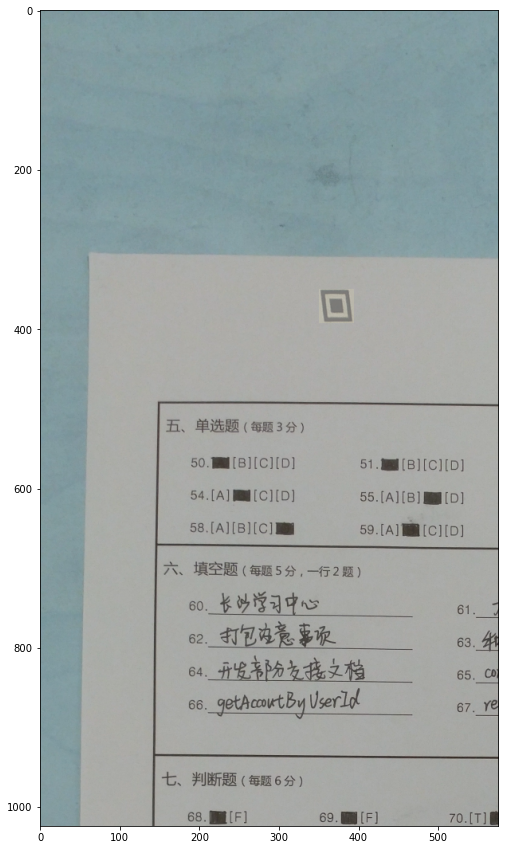

In [47]:
# https://www.jb51.net/article/184488.htm  python使用OpenCV模块实现图像的融合示例代码
# https://blog.csdn.net/fanjiule/article/details/81607873 opencv中addWeighted()函数用法总结
fimg = cv2.imread(join(data_path,'qr','q36.png'), cv2.IMREAD_COLOR)
bimg = cv2.imread(join(data_path,'bg','7.jpg'), cv2.IMREAD_COLOR)
bimg = cv2.resize(bimg,(0,0), fx=2048/bimg.shape[0], fy=2048/bimg.shape[0], interpolation=cv2.INTER_AREA)
print('bimg shape :', bimg.shape)
height, width, _ = bimg.shape
bimg = bimg[0:height//2, 0:width//2,:]
x_pos, y_pos = 350,350
# x_pos, y_pos = 100,100
mix_image = np.ones(fimg.shape, fimg.dtype) 
mix_area_img = bimg[y_pos:y_pos+fimg.shape[0], x_pos:x_pos+fimg.shape[1],:]
mix_image[:,:,0] = np.median(mix_area_img[:,:,0])
mix_image[:,:,1] = np.median(mix_area_img[:,:,1])
mix_image[:,:,2] = np.median(mix_area_img[:,:,2])
mask = np.ones(fimg.shape, np.uint8) * 255
height, width, _ = fimg.shape
center_y =  height//2
center_x =  width//2
center = (center_x,center_y)
# 参数分别为：图1，图1的权重，图2，图2的权重，权重和添加的值为3
fimg = cv2.addWeighted(fimg, 0.4, mix_image, 0.6, 0)
# fimg = cv2.seamlessClone(fimg,mix_image, mask,center, cv2.NORMAL_CLONE)

bimg[y_pos:y_pos+fimg.shape[0], x_pos:x_pos+fimg.shape[1],:] = fimg
plt.imshow(bimg)
plt.show()

# 图片前景做旋转

In [3]:
from math import *
img = cv2.imread(join(data_path,'qr','q1.png'), cv2.IMREAD_COLOR)
# plt.imshow(img)
# plt.show()
degree=3
height,width=img.shape[:2]
heightNew=int(width*fabs(sin(radians(degree)))+height*fabs(cos(radians(degree))))
widthNew=int(height*fabs(sin(radians(degree)))+width*fabs(cos(radians(degree))))

matRotation=cv2.getRotationMatrix2D((width/2,height/2),degree,1)
matRotation[0,2] +=(widthNew-width)/2  #重点在这步，目前不懂为什么加这步
matRotation[1,2] +=(heightNew-height)/2  #重点在这步
imgRotation=cv2.warpAffine(img,matRotation,(widthNew,heightNew),borderValue=(255,255,255))

# plt.imshow(imgRotation)
# plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'

# 图片前景做轻微变形

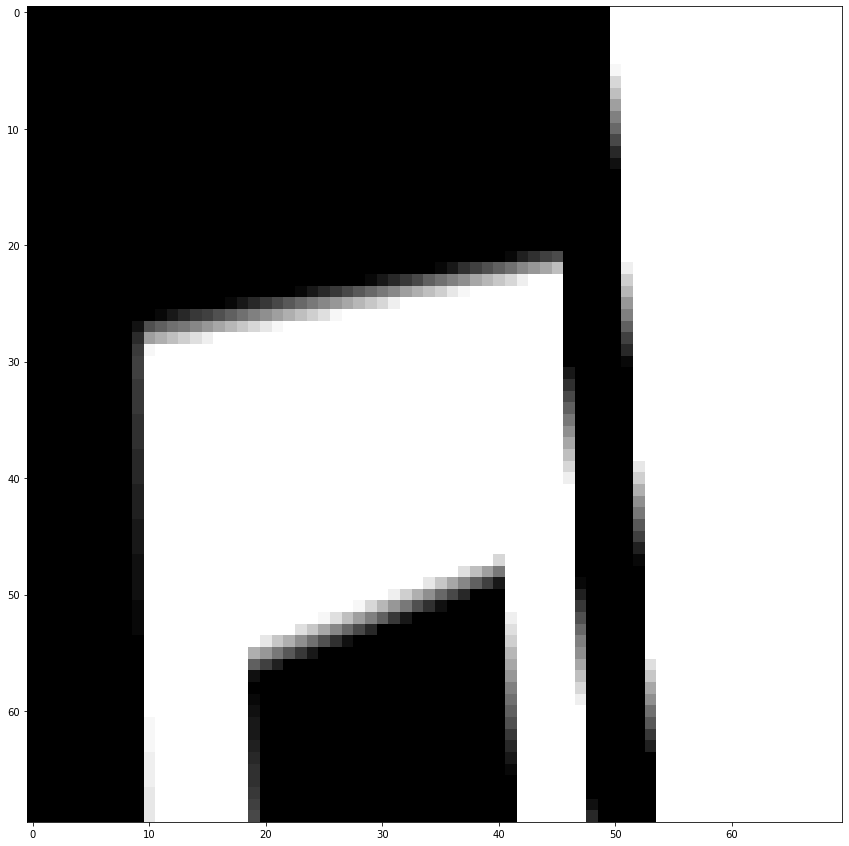

In [75]:
# https://blog.csdn.net/weixin_43848422/article/details/88701017?utm_medium=distribute.pc_relevant.none-task-blog-title-3&spm=1001.2101.3001.4242 Python计算机视觉 图像扭曲（仿射扭曲）
# https://blog.csdn.net/i_chaoren/article/details/78324184 OpenCV—透视变换warpPerspective
im = cv2.imread(join(data_path,'qr','q1.png'), cv2.IMREAD_COLOR)
randomlimit =0.01
perspective = np.eye(3,dtype=np.float32) + np.random.uniform(-randomlimit,randomlimit,(3,3))
perspective[1][1] = 3
im = cv2.warpPerspective(im, perspective, (im.shape[1], im.shape[0]), borderValue=(255,255,255))

plt.imshow(im)
plt.show()


# 图片旋转后，原坐标点计算

In [7]:
# https://blog.csdn.net/mrr1ght/article/details/89196611  python-opencv 图像平移旋转变换、以及图像旋转前后坐标值映射关系
# https://www.cnblogs.com/Shawnyi/p/10370815.html Python 的NumPy 库中dot()函数详解
# https://blog.csdn.net/windowsyun/article/details/78158747 仿射变换

from os.path import join
img = cv2.imread(join(data_path,'error_imgs','taged','00d78ebc-24ff-42b0-ab46-2250401530b7.jpg'), cv2.IMREAD_COLOR)

degree=45
height,width=img.shape[:2]
heightNew=int(width*fabs(sin(radians(degree)))+height*fabs(cos(radians(degree))))
widthNew=int(height*fabs(sin(radians(degree)))+width*fabs(cos(radians(degree))))

matRotation=cv2.getRotationMatrix2D((width/2,height/2),degree,1)
matRotation[0,2] +=(widthNew-width)/2  #重点在这步，目前不懂为什么加这步
matRotation[1,2] +=(heightNew-height)/2  #重点在这步
imgRotation=cv2.warpAffine(img,matRotation,(widthNew,heightNew),borderValue=(np.median(img[:,:,0]),np.median(img[:,:,1]),np.median(img[:,:,2])))

def get_box_pos(src_pos, map_rotation):
    x0,y0,x1,y1 = src_pos
    _src_pos = [(x0,y0),(x0,y1),(x1,y0),(x1,y1)]
    _pos_x_list = []
    _pos_y_list = []
    for pos in _src_pos:
        x,y = pos
        _x,_y = np.dot(map_rotation, np.array([[x],[y],[1]]))
        _pos_x_list.append(int(_x))
        _pos_y_list.append(int(_y))
    dest_pos = [min(_pos_x_list), min(_pos_y_list), max(_pos_x_list), max(_pos_y_list)]
    return dest_pos

boxes = [[115,574,200,652],[3189,589,3278,670]]
for box in boxes:
    
    print('before ', box)
#     x0,y0 = np.dot(matRotation, np.array([[x0],[y0],[1]]))
#     x1,y1 = np.dot(matRotation, np.array([[x1],[y1],[1]]))
#     _x0,_y0,_x1,_y1 = int(x0), int(y0), int(x1), int(y1)
#     x0,y0 = min(_x0,_x1), min(_y0,_y1)
#     x1,y1 = max(_x0,_x1), max(_y0,_y1)
    x0,y0,x1,y1 = get_box_pos(box, matRotation)
    print('after:', x0, ',', y0, ',', x1, ',', y1)
    cv2.rectangle(imgRotation, (x0,y0), (x1, y1), (0, 255, 0), 5)

# plt.imshow(imgRotation)
# plt.show()

NameError: name 'fabs' is not defined

# 图片纠正，通过四个坐标点，采用投影方式

87.0
height: 2000 width: 3076
boxes center : [[ 157.  613.]
 [3233.  629.]
 [ 157. 2613.]
 [3233. 2613.]]
dest  [[   0.    0.]
 [3075.    0.]
 [   0. 1999.]
 [3075. 1999.]]


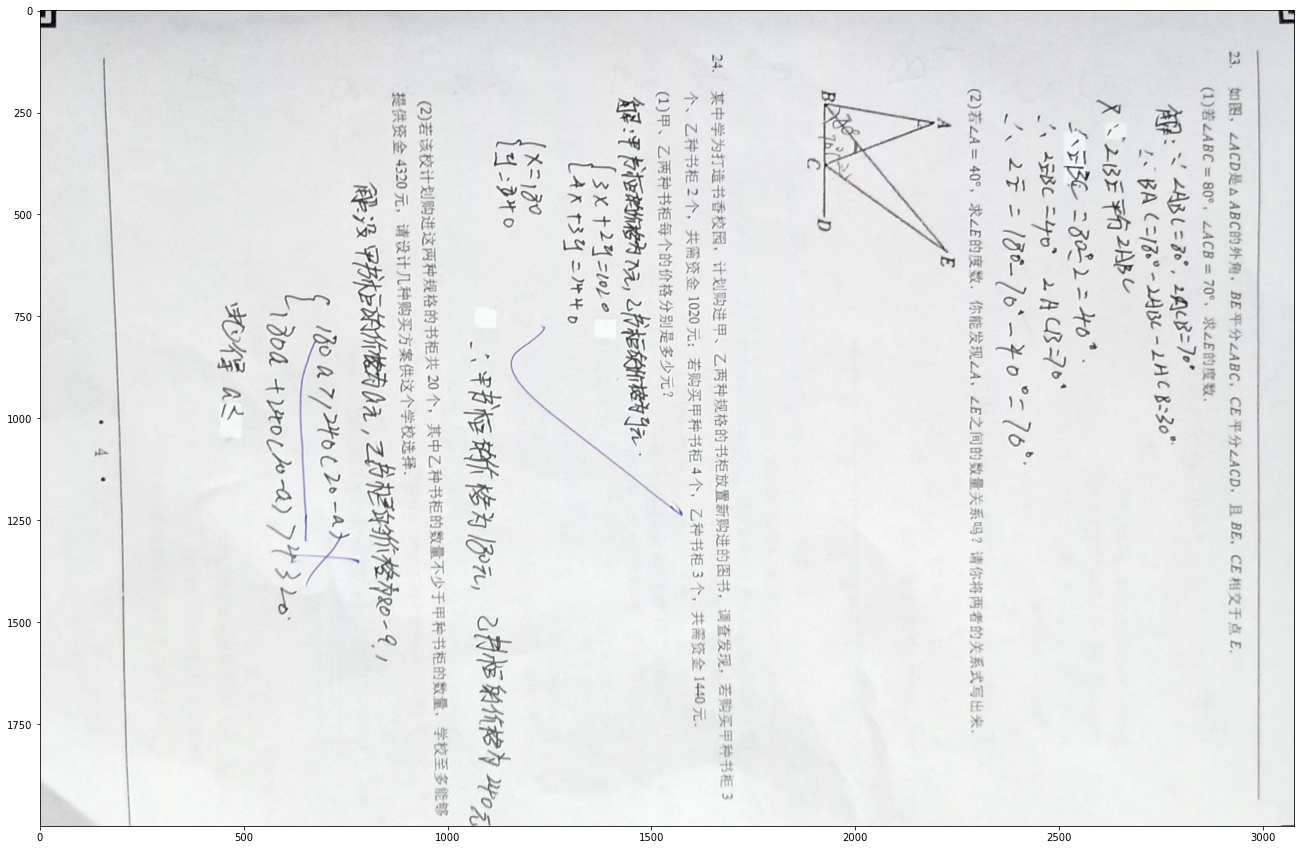

In [29]:
# https://blog.csdn.net/wzz18191171661/article/details/99174861 Python+Opencv4点仿射变换
from os.path import join
img = cv2.imread(join(data_path,'error_imgs','taged','00d78ebc-24ff-42b0-ab46-2250401530b7.jpg'), cv2.IMREAD_COLOR)
def cal_distance(point1, point2):
    dis = np.sqrt(np.sum(np.square(point1[0]-point2[0])+np.square(point1[1]-point2[1])))
#     dis = np.sqrt(((point1[0] - point2[0]) ** 2) + ((point1[1] - point2[1]) ** 2))
    return dis

def box_center(box):
    x0, y0, x1, y1 = box
    center_pos = (x0 + (x1-x0)//2, y0 + (y1-y0) //2)
    return center_pos
boxes = [[115,574,200,652],[3189,589,3278,670],[115,2574,200,2652],[3189,2574,3278,2652]]
_m_width = np.median([x[2] - x[0] for x in boxes])
print(_m_width)
boxes_center = [box_center(x) for x in boxes]
l_t_p, r_t_p, l_b_p, r_b_p = boxes_center
maxHeight = int(max(cal_distance(l_t_p, l_b_p), cal_distance(r_t_p, r_b_p)))
maxWidth = int(max(cal_distance(l_t_p, r_t_p), cal_distance(l_b_p, r_b_p)))
print('height:', height, 'width:', width)

# 构建新图片的4个坐标点
dst = np.array([
    [0, 0],
    [maxWidth - 1, 0],
    [0, maxHeight - 1],
    [maxWidth - 1, maxHeight - 1]], dtype = np.float32)
boxes_center = np.array(boxes_center, dtype=np.float32)
print('boxes center :', boxes_center)
print('dest ', dst)
# 获取仿射变换矩阵并应用它

transMap = cv2.getPerspectiveTransform(boxes_center, dst)

trans_img = cv2.warpPerspective(img, transMap, (maxWidth, maxHeight),cv2.INTER_LINEAR | cv2.WARP_INVERSE_MAP)



# for box in boxes:
#     x0,y0,x1,y1 = box
#     cv2.rectangle(img, (x0,y0), (x1, y1), (0, 255, 0), 5)
plt.imshow(trans_img)
plt.show()

# 文字区域定位

img shape : (74, 65, 3)


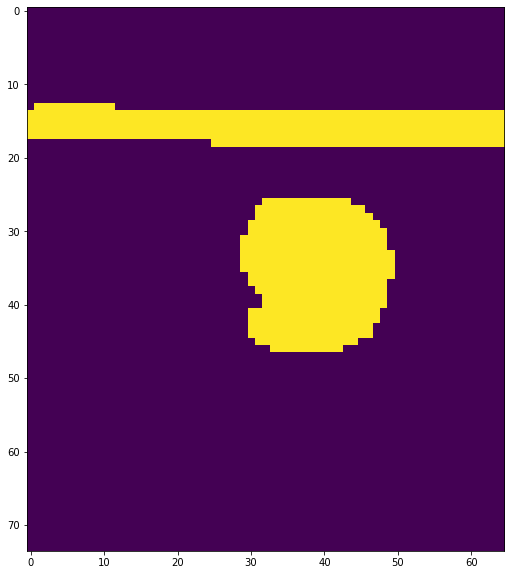

w: 21 h: 21
areas len : 1
areas : [[ 29  26  50  47 441]]
position 29 26 50 47 
char img  shape: (21, 21, 3)


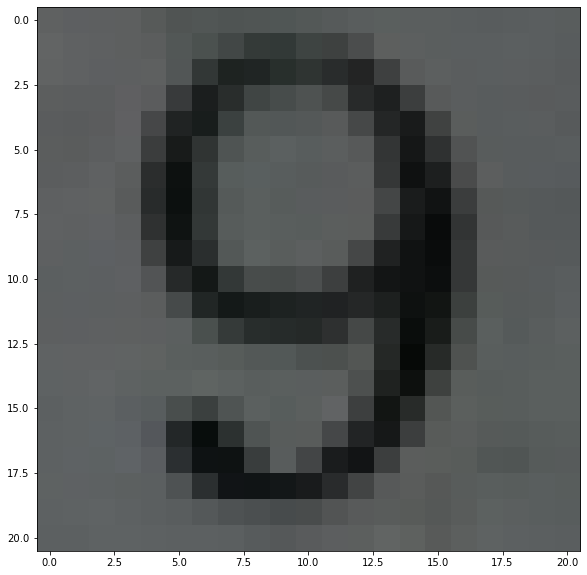

In [29]:
from os.path import join
def detect_char_pos(image_gray_data, min_area = 80,min_y_diff=5):
    img = image_gray_data.copy()
    blur = cv2.GaussianBlur(img, (7,3), 0)
    thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,51,10)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,3))
    dilate = cv2.dilate(thresh, kernel, iterations=1)    
    plt.imshow(dilate)
    plt.show()
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = []
    for cnt in contours:
        if cv2.contourArea(cnt) > min_area:    
            rect = cv2.boundingRect(cnt)
            x,y,w,h = rect
            if (y+h)/2 > img.shape[0]*0.1 and w/h < 3:
                print('w:', w, 'h:',h)
                cnts.append([x,y,x+w,y+h, w*h])
    areas = np.array(cnts,dtype=np.int)
    print('areas len :', len(areas))
    if areas is None or len(areas) == 0:
        return 0,0,0,0
    print('areas :', areas)
    areas_max = np.argmax(areas[:,4], axis=0)
    x1,y1,x2,y2,_ = areas[areas_max]
    return x1,y1,x2,y2
 
img = cv2.imread(join(r'D:\PROJECT_TW\git\data\ocr\number\test_img','1_6.png'), cv2.IMREAD_COLOR)
print('img shape :', img.shape)
image_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
x0,y0,x1,y1 = detect_char_pos(image_gray)
print('position %s %s %s %s ' % (x0,y0,x1,y1))
char_img = img[y0:y1,x0:x1,]
print('char img  shape:', char_img.shape)
plt.imshow(char_img)
plt.show()


# 字符模型处理

TypeError: Image data of dtype object cannot be converted to float

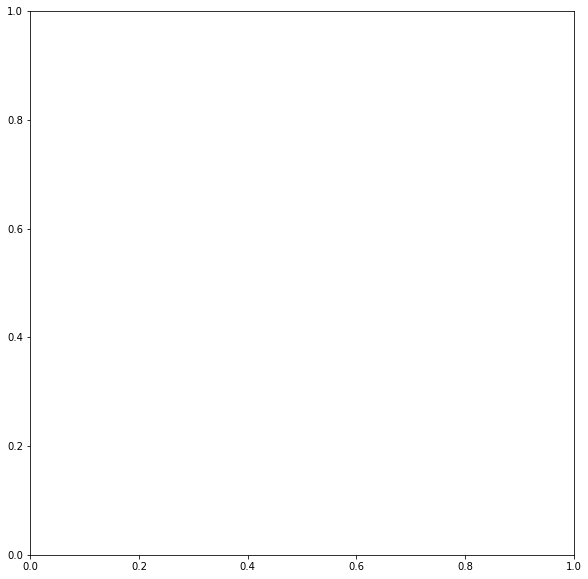

In [24]:
data_path = r'D:\PROJECT_TW\git\data\ocr\number\valid_img'
img_file = '228_41.png'
def mean_blur(image, a, b):
	# (a,b)表示的卷积核[大小]  a代表横向上的模糊，b表示纵向上的模糊
    dst = cv2.blur(image, (a, b))
    return dst

def median_blur(image):
	# 第二个参数是孔径的尺寸，一个大于1的奇数。
    # 比如这里是5，中值滤波器就会使用5×5的范围来计算。
    # 即对像素的中心值及其5×5邻域组成了一个数值集，对其进行处理计算，当前像素被其中值替换掉。
    dst = cv2.medianBlur(image, 1)
    return dst
#     cv.imshow("median_blur", dst)


img = cv2.imread(join(data_path,img_file), cv2.IMREAD_COLOR)
img = median_blur(img) 
# img = mean_blur(img,10,10)
plt.imshow(img)
plt.show()
